In [294]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline 

In [295]:
# load normalized data and true labels
scaled_data = pd.read_csv('../data/GSE910_scaled_top_100.csv', index_col=0)
top_vars = pd.read_csv('../data/_GSE910_top_100_var.csv')
labels = pd.read_csv('../data/GSE910_labels.csv',index_col=0)

# encode categorical labels to numerical codes
labels = labels['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

# count labels
label_counts = {}

for label in labels:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"Label '{label}': {count}")



Label Map:
0: N
1: R
Label 'N': 16
Label 'R': 9


In [296]:
# fix class imbalance

# use SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(scaled_data, labels_encoded)

# count labels after resampling
resampled_counts = {}

for label in y_resampled:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

print(X_resampled)



Label 'N': 16
Label 'R': 9
Label '0': 16
Label '1': 16
      S100A7  HLA-DQA1    MAGEA3    S100A8     DMBT1    MAGEC2  HLA-DQB1  \
0   0.289860  0.634494 -0.001243 -0.360320 -0.906716  1.843763  0.071937   
1  -0.774348  0.772281 -1.493807 -0.912727 -0.893726 -1.423186  0.460190   
2   1.429504 -1.002635  1.240063  1.551765  0.719683  0.780976 -1.366173   
3  -0.897511 -0.774126  1.457942 -0.397389 -0.864712 -0.408723 -1.240249   
4  -0.624348 -1.162335 -1.204793 -0.531867  1.530381 -1.000433 -1.229194   
5  -0.921433 -1.039624 -1.433164 -1.270253 -0.558488 -1.050044 -1.135009   
6  -0.452806  0.769971 -0.860128 -0.686871 -0.087778 -0.537243  0.805753   
7  -0.836445 -0.895176  0.495924 -0.616370  1.015131 -0.802657 -0.503793   
8  -0.749924 -1.070118 -0.993355 -1.012218 -0.508742 -0.669452 -0.886768   
9   1.570678 -0.922194  0.995347  1.475394 -0.290702  0.739475 -0.837558   
10  1.270439  0.331170 -1.626326  1.075268 -0.650185 -1.176613 -0.090350   
11 -0.748457  1.066263  1.071728 

In [297]:
# fit PCA to data
pca = PCA(n_components=10)
pca.fit_transform(X_resampled)

array([[-8.43746164e+00,  2.66508523e+00,  2.37817277e+00,
        -3.28532468e+00,  1.60441362e+00,  3.37971931e-01,
         1.83702381e+00, -2.30812261e+00,  1.96014327e+00,
        -3.00697416e+00],
       [-8.51776378e-01,  5.66125664e+00, -6.45018700e-01,
        -5.56138102e+00, -9.71972176e-01,  3.28164441e-01,
        -1.21939763e+00,  2.19163704e+00, -1.01388370e+00,
        -1.37011939e+00],
       [-6.94564850e+00, -1.19203001e+00, -1.66628756e+00,
        -1.16299834e+00,  9.19458731e-01,  2.93530914e+00,
        -4.15345355e+00, -8.89668677e-01,  9.42812041e-01,
         3.35572716e-01],
       [ 1.04629425e-01,  5.58630596e+00,  1.88922816e+00,
         2.96313954e+00, -3.67988777e+00, -3.15185205e+00,
        -2.68819286e+00,  5.87518398e-01,  2.27047856e+00,
         2.12230944e+00],
       [ 5.15651997e+00,  1.65762999e+00, -4.66308701e+00,
         1.46953040e+00, -2.12351480e+00,  1.26733736e+00,
        -3.51607648e-01, -1.86871949e+00, -2.13184460e+00,
        -4.

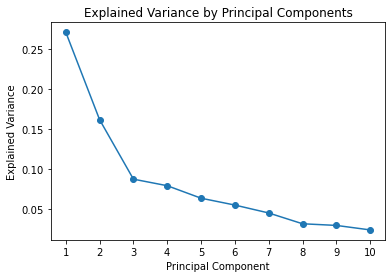

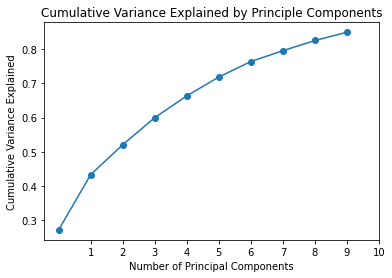

In [298]:
# use elbow method on variance explained to select optimal number of principal components
explained_variance = pca.explained_variance_ratio_

# plot explained variance against principal component
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# also check cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variance Explained by Principle Components')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Cumulative Variance Explained') ;

In [323]:
# optimal pcs
pca2 = PCA(n_components=2)
PCAreduced_data = pca2.fit_transform(X_resampled)

In [336]:
# Get the loadings (coefficients) for the first principal components
loadings = pca2.components_[:2]

# Get the absolute values of the loadings
# abs_loadings = np.abs(loadings)

# Find the indices of top features for each principal component in descending order
top_features_indices = np.argsort(loadings, axis=1)[:, ::-1]

# list genes
genes = list(scaled_data.columns)

# number of pcs
num_pcs = top_features_indices.shape[0]

# for each pc find the top contributing elements
for pc in range(num_pcs):
    
    # top features in each pc
    idx = top_features_indices[pc]
    first = idx[0]
    last = idx[-1]
    
    # list out name of pcs
    print(f"Top positive feature for Principal Component {pc + 1}: {genes[first]}")
    print(f"Top negative feature for Principal Component {pc + 1}: {genes[last]}")


Top positive feature for Principal Component 1: CD79B
Top negative feature for Principal Component 1: SPINK5
Top positive feature for Principal Component 2: C7
Top negative feature for Principal Component 2: SERPINB2


No handles with labels found to put in legend.


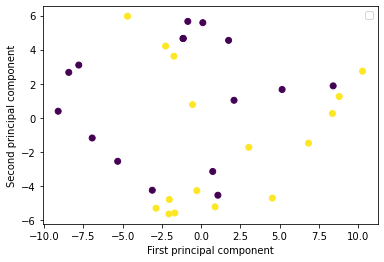

In [337]:
plt.scatter(PCAreduced_data[:, 0], PCAreduced_data[:, 1], c=y_resampled)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

In [340]:
# Train a logistic regression model using the top PCs before optimizing hyperparameters
X_train, X_test, y_train, y_test = train_test_split(PCAreduced_data, y_resampled, test_size = 0.3, random_state=1210)
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
print("Training accuracy before hyperparameter optimization:", training_accuracy)
print("Test set accuracy before hyperparameter optimization:", test_accuracy)

Training accuracy before hyperparameter optimization: 0.8181818181818182
Test set accuracy before hyperparameter optimization: 0.6


In [345]:
# cv of PCA (number of PCs) and L1 logistic regression

pipeline = Pipeline([
    ('pca', PCA()),
    ('clf', LogisticRegression(penalty = 'l1'))

])

hyperparameters = {
    'pca__n_components': list(range(1, 16)),
    'clf__C': [0.1, 1, 10, 100, 1000],
    'clf__solver': ['liblinear', 'saga'],
    'clf__max_iter': [1000]
}

grid_search = GridSearchCV(pipeline, hyperparameters,  cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'clf__C': 0.1, 'clf__max_iter': 1000, 'clf__solver': 'liblinear', 'pca__n_components': 2}


/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
650 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self

In [346]:
# Train a logistic regression model using the top PCs after optimizing hyperparameters
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)

print("Training accuracy after hyperparameter optimization:", training_accuracy)
print("Test set accuracy after hyperparameter optimization:", test_accuracy)

Training accuracy after hyperparameter optimization: 0.7272727272727273
Test set accuracy after hyperparameter optimization: 0.4


In [356]:
# export smote data
smote_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis =1)
smote_data = smote_data.rename(columns={smote_data.columns[-1]: 'Response'})
smote_data.to_csv('../data/GSE910_smote_data.csv')